## Analysis of rape calls for service to Seattle Police Department referred to their Telephone Reporting Unit

By Stacy Montemayor

I conducted an exploratory analysis of Seattle Police Department calls for service pertaining to various violent crimes, from 2010 through 2018. In analyzing these calls for service I discovered that a small percentage of violent crimes had been referred to SPD's Telephone Reporting Unit. However, calls for service reporting stranger rape, acquaitance rape and molestation were referred to this unit at a much higher rate - in some cases n times as often. 


In [28]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline

### Import and clean Call Data

In [2]:
%run import_clean_call_data.ipynb

### Analysis

Show the number of calls for service reporting rape that were referred to the Telephone Reporting Unit

In [3]:
# Create a mask and dataframe that includes only calls that were referred to the TRU.
data_tru_df = data[is_tru_mask]

# Transform dataframe to include only the calls with the final_call_type is either stranger rape or acquaintance rape.
data_tru_df = data_tru_df[data_tru_df.final_call_type.str.contains('Stranger|Acquaintance')]

In [7]:
# Create dataframe for that contains the counts for each of these final call types, by year
tru_rape_counts = pd.DataFrame(data_tru_df)
tru_rape_counts = pd.crosstab(tru_rape_counts.year, columns=tru_rape_counts.final_call_type)
tru_rape_counts = tru_rape_counts.stack().reset_index()
tru_rape_counts = tru_rape_counts.rename(columns={0: 'final_call_type_count'})

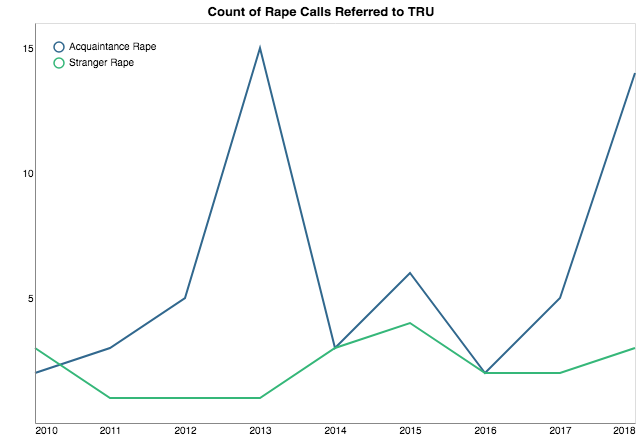

In [18]:
# Visualization showing the number of calls reporting each rape call type that were referred to TRU

alt.Chart(tru_rape_counts).mark_line().encode(
    x=alt.X('year', axis=alt.Axis(format='Y', title='', ticks=False)),
    y=alt.Y('final_call_type_count', axis=alt.Axis(title='', ticks=False, values=[5,10,15])),
    color=alt.Color('final_call_type', legend=alt.Legend(title='', orient='top-left'), scale=alt.Scale(scheme='viridis')),
).properties(
    title='Count of Rape Calls Referred to TRU',
    width=600,
    height=400
).configure_axis(
    grid=False
)

Show the percentage of calls - by final call type - that were referred to the Telephone Reporting Unit

In [35]:
# Create crosstab to view % all TRU calls by crime type

percentage_tru_calls = pd.crosstab(data.final_call_type,data.is_TRU,
                          normalize = 'index').rename_axis(None)

# Multiply all percentages by 100 to convert to percentages. 
percentage_tru_calls *= 100

percentage_tru_calls

is_TRU,no,yes
Acquaintance Rape,97.597204,2.402796
Armed Robbery,99.914879,0.085121
Assault w/ Firearm,99.025579,0.974421
CSEC,98.076923,1.923077
Drive-by Shooting,99.912511,0.087489
Homicide,100.000000,0.000000
Kidnap,98.989899,1.010101
Lewd Conduct,99.076139,0.923861
Molesting,97.176309,2.823691
Stranger Rape,98.655914,1.344086


Sex crimes where there is a victim, are initially sent to TRU at higher rates than other violent crimes. For the nine years of police calls examined, non-sex-related violent crimes sent to TRU averaged less than 1% of the time. In the same time period, 2.4% of calls reporting acquaintance rape and 2.8% of molestation were sent to TRU.

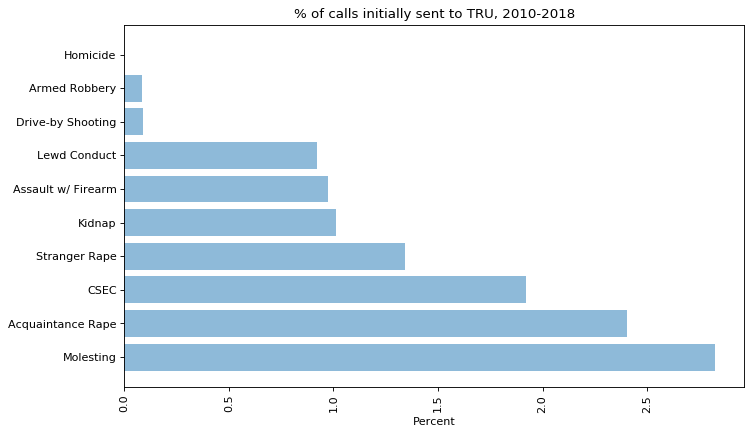

In [34]:
# Plot TRU call percentages as bar graph. 

percentage_tru_sorted = percentage_tru_calls.sort_values('yes',ascending=False)

plt.figure(figsize=(10,6), dpi= 80)
plt.barh(percentage_tru_sorted.index, percentage_tru_sorted.yes, align='center', alpha=0.5)
plt.xlabel('Percent')
plt.title('% of calls initially sent to TRU, 2010-2018')
plt.xticks(rotation=90)

plt.show()